Part 1 answer: 230461440
Part 2 answer: 6668


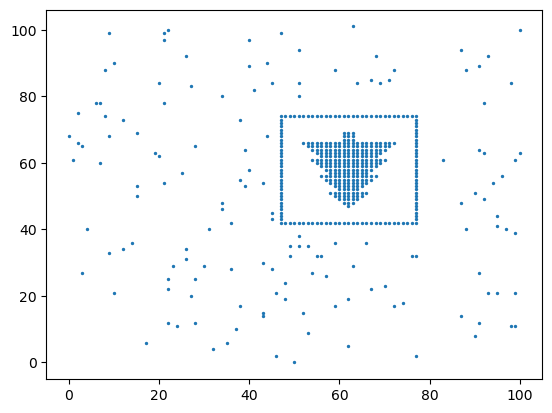

In [14]:
from dataclasses import dataclass
import re
import numpy as np
import matplotlib.pyplot as plt


@dataclass
class Robot:
    x: int
    y: int
    vx: int
    vy: int
    map_size: tuple[int, int]

    def move(self):
        self.x += self.vx
        self.y += self.vy

        if self.x < 0:
            self.x = self.map_size[1] + self.x
        elif self.x >= self.map_size[1]:
            self.x = self.x - self.map_size[1]
        if self.y < 0:
            self.y = self.map_size[0] + self.y
        elif self.y >= self.map_size[0]:
            self.y = self.y - self.map_size[0]

    def __repr__(self):
        return f"Robot(x={self.x}, y={self.y}, vx={self.vx}, vy={self.vy})"


def parse_input(input_text, map_size):
    parsed_input = re.findall(r"p=(-?\d+),(-?\d+) v=(-?\d+),(-?\d+)", input_text)
    robots = []
    for line in parsed_input:
        x, y, vx, vy = map(int, line)
        robots.append(Robot(x, y, vx, vy, map_size))
    return robots


def calc_safety_factor(robots, map_size):
    tl, tr, bl, br = 0, 0, 0, 0
    tl_limits = ((map_size[0] - 1) / 2) - 1, ((map_size[1] - 1) / 2) - 1
    tr_limits = ((map_size[0] - 1) / 2) - 1, ((map_size[1] + 1) / 2)
    bl_limits = ((map_size[0] + 1) / 2), ((map_size[1] - 1) / 2) - 1
    br_limits = ((map_size[0] + 1) / 2), ((map_size[1] + 1) / 2)

    for robot in robots:
        if robot.x <= tl_limits[1] and robot.y <= tl_limits[0]:
            tl += 1
        elif robot.x >= tr_limits[1] and robot.y <= tr_limits[0]:
            tr += 1
        elif robot.x <= bl_limits[1] and robot.y >= bl_limits[0]:
            bl += 1
        elif robot.x >= br_limits[1] and robot.y >= br_limits[0]:
            br += 1

    return tl * tr * bl * br


def check_if_message(robots, map_size):
    locations = np.zeros(map_size)
    for robot in robots:
        locations[robot.y, robot.x] += 1
    return np.max(locations) > 1


def part_1(input_text, map_size, seconds):
    robots = parse_input(input_text, map_size)
    for _ in range(seconds):
        for robot in robots:
            robot.move()
    return calc_safety_factor(robots, map_size)


def part_2(input_text, map_size, seconds):
    robots = parse_input(input_text, map_size)
    for i in range(seconds):
        for robot in robots:
            robot.move()
        if not check_if_message(robots, map_size):
            return i + 1, robots


map_size = (103, 101)
input_text = open("day14.txt", "r").read()

part_1_answer = part_1(input_text=input_text, map_size=map_size, seconds=100)
part_2_answer, robots = part_2(input_text=input_text, map_size=map_size, seconds=10000)

print(f"Part 1 answer: {part_1_answer}")
print(f"Part 2 answer: {part_2_answer}")

plt.scatter([robot.x for robot in robots], [robot.y for robot in robots], s=2)
plt.show()